<a href="https://colab.research.google.com/github/tracijo32/astralar/blob/master/walabot_cnn_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
# please, uncomment the week you're working on
# setup_google_colab.setup_week1()
# setup_google_colab.setup_week2()
setup_google_colab.setup_week3()
# setup_google_colab.setup_week4()
# setup_google_colab.setup_week5()
# setup_google_colab.setup_week6()

shred: setup_google_colab.py: failed to open for writing: No such file or directory
--2019-06-21 15:08:28--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3792 (3.7K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.70K  --.-KB/s    in 0s      

2019-06-21 15:08:28 (63.4 MB/s) - ‘setup_google_colab.py’ saved [3792/3792]

**************************************************
102flowers.tgz
**************************************************
imagelabels.mat
**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.ta

In [0]:
import sys
sys.path.append("..")
import download_utils

In [3]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import grading_utils
import keras_utils
from keras_utils import reset_tf_session

Using TensorFlow backend.


1.14.0-rc1
2.0.6


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Walabot-Data/'

In [6]:
!ls "gdrive/My Drive/Walabot-Data"

data2d.h5  data.h5  rpi3-floatypotato


In [0]:
import numpy as np
import h5py


hf = h5py.File(root_path+'data.h5','r')
fullclip = np.array(hf.get('fullclip'))
emptyclip = np.array(hf.get('emptyclip'))
pipe = np.array(hf.get('pipe'))
hf.close()

In [0]:
X = np.stack([np.concatenate([fullclip,emptyclip,pipe])],axis=4)
del fullclip
del emptyclip
del pipe

In [9]:
X.shape

(15000, 60, 50, 10, 1)

In [0]:
y = np.array([0]*5000 + [1]*5000 + [2]*5000)

In [12]:
y.shape

(15000,)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
del X
del y

In [0]:
y_train2 = keras.utils.to_categorical(y_train)
y_test2 = keras.utils.to_categorical(y_test)

In [0]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv3D, Conv2D, MaxPooling2D, MaxPooling3D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    
    model.add(Conv3D(16,(2,2,2),padding='same',input_shape=(60,50,10,1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv3D(32,(2,2,2),padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling3D((2,2,2)))
              
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    return model

In [17]:
# describe model
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()

W0621 15:14:59.486778 139890411071360 deprecation_wrapper.py:119] From /content/keras_utils.py:68: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0621 15:14:59.491143 139890411071360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0621 15:14:59.492688 139890411071360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:82: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 15:14:59.536908 139890411071360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:84: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 15:14:59.537990 139890411071360 deprecation_wrapper.py:119] F

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 60, 50, 10, 16)    144       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 60, 50, 10, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 50, 10, 32)    4128      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 60, 50, 10, 32)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 30, 25, 5, 32)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30720256  
__________

In [18]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

s = reset_tf_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

W0621 15:15:40.547461 139890411071360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:697: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 15:15:40.550765 139890411071360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2745: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'walabot.{0:03d}.hdf5'
last_finished_epoch = None

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
# from keras.models import load_model
# s = reset_tf_session()
# last_finished_epoch = 7
# model = load_model(model_filename.format(last_finished_epoch))

In [21]:
# fit model
model.fit(
    X_train, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               keras_utils.TqdmProgressCallback(),
               keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(X_test, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
)

W0621 15:16:05.678943 139890411071360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 15:16:05.780339 139890411071360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:602: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Learning rate: 0.005

Epoch 1/10
**************************************************
loss: 0.4862; acc: 0.9684; val_loss: 0.0537; val_acc: 0.9967
Model saved in walabot.000.hdf5
Learning rate: 0.0045

Epoch 2/10
**************************************************
loss: 0.0470; acc: 0.9971; val_loss: 0.0537; val_acc: 0.9967
Model saved in walabot.001.hdf5
Learning rate: 0.00405

Epoch 3/10
**************************************************
loss: 0.0470; acc: 0.9971; val_loss: 0.0537; val_acc: 0.9967
Model saved in walabot.002.hdf5
Learning rate: 0.003645

Epoch 4/10
**************************************************
loss: 0.0470; acc: 0.9971; val_loss: 0.0537; val_acc: 0.9967
Model saved in walabot.003.hdf5
Learning rate: 0.0032805

Epoch 5/10
**************************************************
loss: 0.0470; acc: 0.9971; val_loss: 0.0537; val_acc: 0.9967
Model saved in walabot.004.hdf5
Learning rate: 0.00295245

Epoch 6/10
**************************************************
loss: 0.0470; ac

In [22]:
y_pred_test = model.predict_proba(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

2976/3000 [============================>.] - ETA: 0s

In [0]:
y_pred.shape

(3000, 3)

Text(0, 0.5, 'True label')

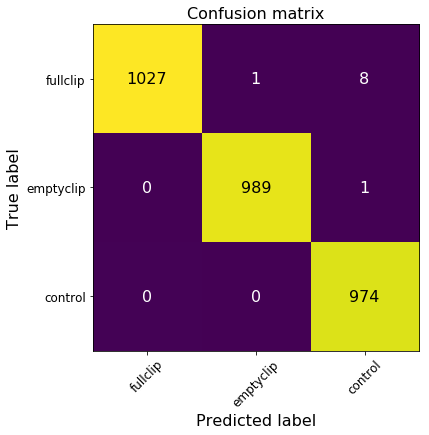

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.xticks(np.arange(3), ['fullclip','emptyclip','control'], rotation=45, fontsize=12)
plt.yticks(np.arange(3), ['fullclip','emptyclip','control'], fontsize=12)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        if i == j:
            color = 'k'
        else:
            color = 'w'
        plt.text(i,j,cm[i,j],size=16,color=color,va='center',ha='center')
plt.xlabel('Predicted label',size=16)
plt.ylabel('True label',size=16)


In [37]:
cm.ravel()

array([1027,    0,    0,    1,  989,    0,    8,    1,  974])

In [39]:
cm[2,0]

8